In [6]:
import pandas as pd
import numpy as np
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:>

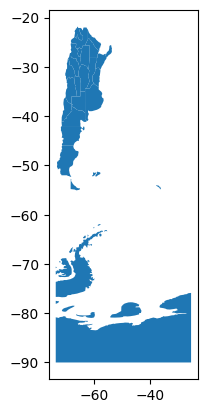

In [7]:
df_places = gpd.read_file('geojson/ign_provincia.json')
df_places2=df_places[df_places['IN1']=='06']
df_places2
df_places.plot()

In [8]:
df_places = gpd.read_file('geojson/departamento_3.json')
df_places2=df_places[(df_places['in1'].str.slice(0, 3)=='006') | (df_places['in1'].str.slice(0, 3)=='002')]
df_places2


,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,0,Departamento,Partido de General Alvarado,Partido,General Alvarado,006280,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-57.77680 -38.24552, -57.78195 -38.2..."
1,0,Departamento,Partido de General Pueyrredón,Partido,General Pueyrredón,006357,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-57.51973 -37.88948, -57.69799 -37.7..."
2,0,Departamento,Partido de Mar Chiquita,Partido,Mar Chiquita,006518,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-57.76890 -37.13602, -58.09451 -37.4..."
3,0,Departamento,Partido de Villa Gesell,Partido,Villa Gesell,006868,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-56.90913 -37.18903, -56.94955 -37.1..."
4,0,Departamento,Partido de Pinamar,Partido,Pinamar,006644,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-56.90913 -37.18903, -56.79023 -37.0..."
...,...,...,...,...,...,...,...,...,...
427,0,Departamento,Partido de Florentino Ameghino,Partido,Florentino Ameghino,006277,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-62.34816 -34.65378, -62.58485 -34.6..."
517,0,Departamento,Partido de Lanús,Partido,Lanús,006434,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-58.42383 -34.66228, -58.44692 -34.6..."
520,0,Departamento,Partido de Lomas de Zamora,Partido,Lomas de Zamora,006490,None,ARBA - Gerencia de Servicios Catastrales,"POLYGON ((-58.34696 -34.73934, -58.41327 -34.7..."
525,0,Departamento,Comuna 15,Comuna,Comuna 15,002105,None,Direc. de Catastro,"POLYGON ((-58.44441 -34.58319, -58.46805 -34.5..."


<AxesSubplot:>

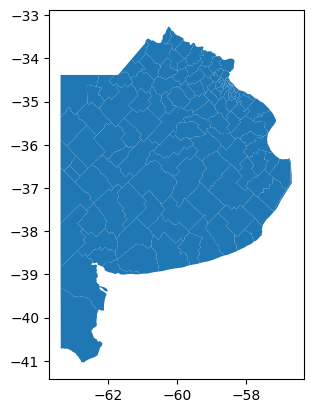

In [9]:
df_places2.plot()

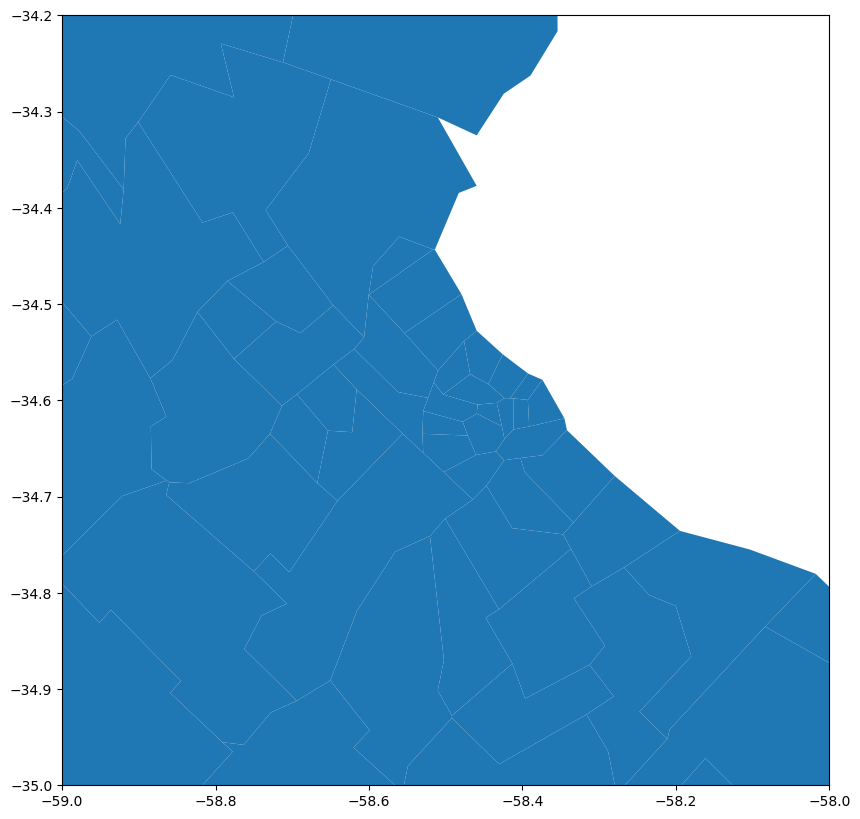

In [10]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = df_places2.plot(ax=ax)
ax.set_xlim([-59, -58])
ax.set_ylim([-35, -34.2])
plt.show()

In [15]:

m = folium.Map(location=[-34.6, -58.4], zoom_start=11, tiles='CartoDB positron', max_bounds = True)
m

In [16]:
for _, r in df_places2.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    if (r['in1'][0:3]=='002'):
        geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'weight':1, 'color':'gray','fillColor': 'orange','fillOpacity':0.2})
    else :            
        geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'weight':1,'color':'gray','fillColor': 'green','fillOpacity':0.2})            
    folium.Popup(r['fna']).add_to(geo_j)
    geo_j.add_to(m)
m

In [17]:
hsp = pd.read_csv('hospitales_coordenadas.csv',dtype=str)
hsp.head()

,latitude,longitude,name,label
0,-34.6288473603881,-58.3775508488443,HOSPITAL GENERAL DE NIÑOS PEDRO DE ELIZALDE,"MONTES DE OCA, MANUEL AV. 40"
1,-34.5941919726393,-58.4120700769456,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,GALLO 1330
2,-34.5845283357505,-58.4027276547828,HOSPITAL DE ODONTOLOGIA DR. RAMON CARRILLO (EX...,SANCHEZ DE BUSTAMANTE 2529
3,-34.6394041316484,-58.3851559118889,HOSPITAL DE SALUD MENTAL BRAULIO MOYANO,BRANDSEN 2570
4,-34.6341535760002,-58.3913114406535,HOSPITAL DE GASTROENTEROLOGIA B. UDAONDO,CASEROS AV. 2061


In [18]:
for _, r in hsp.iterrows():
    lat = r['latitude']
    lon = r['longitude']
    folium.Marker(location=[lat, lon],
                  popup='Nombre: {} <br> Direccion: {}'.format(r['name'], r['label'])).add_to(m)

m